In [15]:
import tsplib95
import numpy as np
import random
import tsplib95
from typing import List
from numpy.random import default_rng
from itertools import chain
from genetic_algorithm import GeneticAlgorithm
import matplotlib.pyplot as plt
import pandas as pd

p01 = tsplib95.load('datasets/p01.tsp.txt')
at48 = tsplib95.load('datasets/att48.tsp.txt')

Define help function

In [27]:

#Generate a list of unique random parameter sets for the TSP problem solved with a genetic algorithm.
#Optimal values for mutation and crossover have a higher chance of being selected.
def generate_unique_random_tsp_parameters(num_cities, num_sets):

    # Determine population size based on the number of cities
    population_size = 5 if num_cities < 10 else 1000

    if num_cities > 10:
        population_size = 400
    elif num_cities > 5:
        population_size = 30
    else:
        population_size = 6


    # Parameters ranges
    num_generations = 2000
    elitism_rate = 0.15  # 15%
    # Optimal values have a higher probability
    mutation_rates = [0, 0.05, 0.1, 0.15, 0.2, 0.5, 0.8]
    mutation_rate_probs = [0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1]

    crossover_rates = [0, 0.2, 0.5, 0.6, 0.7,0.8,0.9,1] # here is a higher chance to be selected
    selection_methods = [0, 1,2,3,4]  # Roulette, Rank Selection
    crossover_methods = [0, 1, 2, 3]  # One-point, Two-point, Order, Cyclic
    mutation_methods = [0, 1, 2, 3]  # Tower, Inversion, Rotation, Thor's

    parameter_sets = set()

    while len(parameter_sets) < num_sets:
        parameters = (
            population_size,
            num_generations,
            np.random.choice(mutation_rates,p=mutation_rate_probs),
            elitism_rate,
            np.random.choice(crossover_rates),
            np.random.choice(selection_methods),
            np.random.choice(crossover_methods),
            np.random.choice(mutation_methods)
        )
        parameter_sets.add(parameters)

    # Convert to list of dicts
    return [{"population_size": p[0], "num_generations": p[1], "mutation_rate": p[2],
             "elitism_rate": p[3], "crossover_rate": p[4], "selection_method": p[5],
             "crossover_method": p[6], "mutation_method": p[7]} for p in parameter_sets]

# Example usage to generate 5 unique random parameter sets for a problem with 12 cities
unique_random_parameters = generate_unique_random_tsp_parameters(12, 5)
unique_random_parameters



[{'population_size': 400,
  'num_generations': 2000,
  'mutation_rate': 0.05,
  'elitism_rate': 0.15,
  'crossover_rate': 0.8,
  'selection_method': 0,
  'crossover_method': 0,
  'mutation_method': 1},
 {'population_size': 400,
  'num_generations': 2000,
  'mutation_rate': 0.1,
  'elitism_rate': 0.15,
  'crossover_rate': 0.9,
  'selection_method': 4,
  'crossover_method': 3,
  'mutation_method': 2},
 {'population_size': 400,
  'num_generations': 2000,
  'mutation_rate': 0.1,
  'elitism_rate': 0.15,
  'crossover_rate': 0.8,
  'selection_method': 1,
  'crossover_method': 3,
  'mutation_method': 1},
 {'population_size': 400,
  'num_generations': 2000,
  'mutation_rate': 0.15,
  'elitism_rate': 0.15,
  'crossover_rate': 0.7,
  'selection_method': 4,
  'crossover_method': 2,
  'mutation_method': 2},
 {'population_size': 400,
  'num_generations': 2000,
  'mutation_rate': 0.15,
  'elitism_rate': 0.15,
  'crossover_rate': 0.2,
  'selection_method': 2,
  'crossover_method': 0,
  'mutation_metho

In [43]:
def run_genetic_algorithm_for_different_parameteres(problem, parameters):
   
   # for each parameter set we run the function 10 times, and take take the worst cost, average and best cost
    evolution_of_minimum = []
    best_tour_length = float("inf")
    results = []
    counter = 0
    position_of_best = float("inf")
    for param in parameters:
        counter = counter +1
        print(param)
        tour_minimas = []
        generation_numbers = []
        for i in range(10):

          gen = GeneticAlgorithm(problem,
                               population_size=param["population_size"],
                               elitism=param["elitism_rate"],
                               mutation_rate=param["mutation_rate"],
                               crossover_rate=param["crossover_rate"],
                               selection_method=param["selection_method"],
                               crossover_method=param["crossover_method"],
                               mutation_method=param["mutation_method"])

          gen.use_genetic_algorithm(param["num_generations"])
          ev = gen.evolution_of_minimum()
          # append only the generation number till the minimuum firs occurs
          generation_numbers.append(ev.index(min(ev))+1)
          tour_minimas.append(min(ev))
          
          if tour_minimas[-1] < best_tour_length:
            best_tour_length = tour_minimas[-1]
            evolution_of_minimum = ev[:ev.index(min(ev))+1]
            position_of_best = counter

        praram_result = param.copy()
        praram_result["best cost"] = np.min(tour_minimas)
        praram_result["average cost"] = np.mean(tour_minimas)
        praram_result["worst cost"] = np.max(tour_minimas)
        praram_result["best gen"] = np.min(generation_numbers)
        praram_result["average gen"] = np.mean(generation_numbers)
        praram_result["worst gen"] = np.max(generation_numbers)
        results.append(praram_result)



    print(position_of_best)
    plt.plot(list(range(1, len(evolution_of_minimum) + 1)), evolution_of_minimum)
    print(evolution_of_minimum)

   
    return results
   # calc average, wrost and best
   #TODO: continue here
   #average = average(tour_minimas)


In [4]:
# function to search for the last change in an evolution array
a = [30,22,21,19,19,19,19]
print(a.index(19))
print()

3



# For date set five

In [61]:
# function to ouput
five = tsplib95.load('datasets/five.tsp')
parameters = generate_unique_random_tsp_parameters(five.dimension, 6)
parameters

[{'population_size': 6,
  'num_generations': 2000,
  'mutation_rate': 0.05,
  'elitism_rate': 0.15,
  'crossover_rate': 0.7,
  'selection_method': 2,
  'crossover_method': 0,
  'mutation_method': 3},
 {'population_size': 6,
  'num_generations': 2000,
  'mutation_rate': 0.15,
  'elitism_rate': 0.15,
  'crossover_rate': 0.5,
  'selection_method': 1,
  'crossover_method': 3,
  'mutation_method': 0},
 {'population_size': 6,
  'num_generations': 2000,
  'mutation_rate': 0.05,
  'elitism_rate': 0.15,
  'crossover_rate': 0.7,
  'selection_method': 4,
  'crossover_method': 3,
  'mutation_method': 1},
 {'population_size': 6,
  'num_generations': 2000,
  'mutation_rate': 0.5,
  'elitism_rate': 0.15,
  'crossover_rate': 0.0,
  'selection_method': 2,
  'crossover_method': 1,
  'mutation_method': 0},
 {'population_size': 6,
  'num_generations': 2000,
  'mutation_rate': 0.5,
  'elitism_rate': 0.15,
  'crossover_rate': 0.8,
  'selection_method': 2,
  'crossover_method': 0,
  'mutation_method': 2},
 {

{'population_size': 6, 'num_generations': 2000, 'mutation_rate': 0.05, 'elitism_rate': 0.15, 'crossover_rate': 0.7, 'selection_method': 2, 'crossover_method': 0, 'mutation_method': 3}
{'population_size': 6, 'num_generations': 2000, 'mutation_rate': 0.15, 'elitism_rate': 0.15, 'crossover_rate': 0.5, 'selection_method': 1, 'crossover_method': 3, 'mutation_method': 0}
{'population_size': 6, 'num_generations': 2000, 'mutation_rate': 0.05, 'elitism_rate': 0.15, 'crossover_rate': 0.7, 'selection_method': 4, 'crossover_method': 3, 'mutation_method': 1}
{'population_size': 6, 'num_generations': 2000, 'mutation_rate': 0.5, 'elitism_rate': 0.15, 'crossover_rate': 0.0, 'selection_method': 2, 'crossover_method': 1, 'mutation_method': 0}
{'population_size': 6, 'num_generations': 2000, 'mutation_rate': 0.5, 'elitism_rate': 0.15, 'crossover_rate': 0.8, 'selection_method': 2, 'crossover_method': 0, 'mutation_method': 2}
{'population_size': 6, 'num_generations': 2000, 'mutation_rate': 0.8, 'elitism_rat

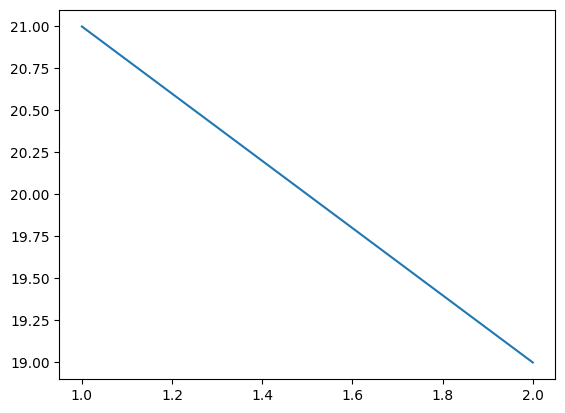

In [66]:
# the parameters look good
results = run_genetic_algorithm_for_different_parameteres(five,parameters)

df = pd.DataFrame(results)


In [67]:
df.head(10)

,population_size,num_generations,mutation_rate,elitism_rate,crossover_rate,selection_method,crossover_method,mutation_method,best cost,average cost,worst cost,best gen,average gen,worst gen
0,6,2000,0.05,0.15,0.7,2,0,3,19,19.2,21,1,15.2,49
1,6,2000,0.15,0.15,0.5,1,3,0,19,19.2,21,1,11.7,46
2,6,2000,0.05,0.15,0.7,4,3,1,19,19.4,21,1,16.7,51
3,6,2000,0.50,0.15,0.0,2,1,0,19,19.0,19,1,13.0,38
4,6,2000,0.50,0.15,0.8,2,0,2,19,19.0,19,1,3.3,12
5,6,2000,0.80,0.15,0.9,4,1,3,19,19.0,19,1,5.6,16


In [68]:
cols = list(df.columns)
cols.remove("num_generations")
df = df[cols].copy()

parameter_df = df.iloc[:,:7]
parameter_df.head()
result_df = df.iloc[:,7:]
result_df.head()

,best cost,average cost,worst cost,best gen,average gen,worst gen
0,19,19.2,21,1,15.2,49
1,19,19.2,21,1,11.7,46
2,19,19.4,21,1,16.7,51
3,19,19.0,19,1,13.0,38
4,19,19.0,19,1,3.3,12
